In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


In [4]:
start = '2010-01-01'
end = '2024-12-31'

df = yf.download('SBIN.BO', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO
Date,,,,,
2010-01-04,86.975395,87.256251,85.965817,85.965817,3292160
2010-01-05,86.986778,87.873001,85.990486,86.113835,3164620
2010-01-06,87.485878,87.859725,86.705920,87.290415,4354310
2010-01-07,87.013344,87.594040,86.683146,87.594040,2545580
2010-01-08,86.800812,87.332171,86.614841,87.256259,2654490


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO
Date,,,,,
2024-12-23,804.789185,807.681124,796.407508,802.240331,281649
2024-12-24,795.868286,809.298606,793.270489,808.759445,431577
2024-12-26,795.672302,806.749844,792.094130,796.995703,194920
2024-12-27,783.810425,802.632475,781.555713,801.162003,1061163
2024-12-30,772.781921,792.094129,769.742970,786.898474,686161


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3673 entries, 2010-01-04 to 2024-12-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, SBIN.BO)   3673 non-null   float64
 1   (High, SBIN.BO)    3673 non-null   float64
 2   (Low, SBIN.BO)     3673 non-null   float64
 3   (Open, SBIN.BO)    3673 non-null   float64
 4   (Volume, SBIN.BO)  3673 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 172.2 KB


In [7]:
%config Completer.use_jedi = False

In [8]:
df = df.reset_index()

In [9]:

df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO
0,2010-01-04,86.975395,87.256251,85.965817,85.965817,3292160
1,2010-01-05,86.986778,87.873001,85.990486,86.113835,3164620
2,2010-01-06,87.485878,87.859725,86.705920,87.290415,4354310
3,2010-01-07,87.013344,87.594040,86.683146,87.594040,2545580
4,2010-01-08,86.800812,87.332171,86.614841,87.256259,2654490


In [10]:
df = df.drop(['Date'], axis = 1)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO
0,86.975395,87.256251,85.965817,85.965817,3292160
1,86.986778,87.873001,85.990486,86.113835,3164620
2,87.485878,87.859725,86.705920,87.290415,4354310
3,87.013344,87.594040,86.683146,87.594040,2545580
4,86.800812,87.332171,86.614841,87.256259,2654490


In [11]:
df

Price,Close,High,Low,Open,Volume
Ticker,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO
0,86.975395,87.256251,85.965817,85.965817,3292160
1,86.986778,87.873001,85.990486,86.113835,3164620
2,87.485878,87.859725,86.705920,87.290415,4354310
3,87.013344,87.594040,86.683146,87.594040,2545580
4,86.800812,87.332171,86.614841,87.256259,2654490
...,...,...,...,...,...
3668,804.789185,807.681124,796.407508,802.240331,281649
3669,795.868286,809.298606,793.270489,808.759445,431577
3670,795.672302,806.749844,792.094130,796.995703,194920


In [12]:
ma100 = df.Close.rolling(100).mean()

In [13]:
ma100

Ticker,SBIN.BO
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3668,801.848728
3669,801.347787
3670,800.756168
3671,800.036126


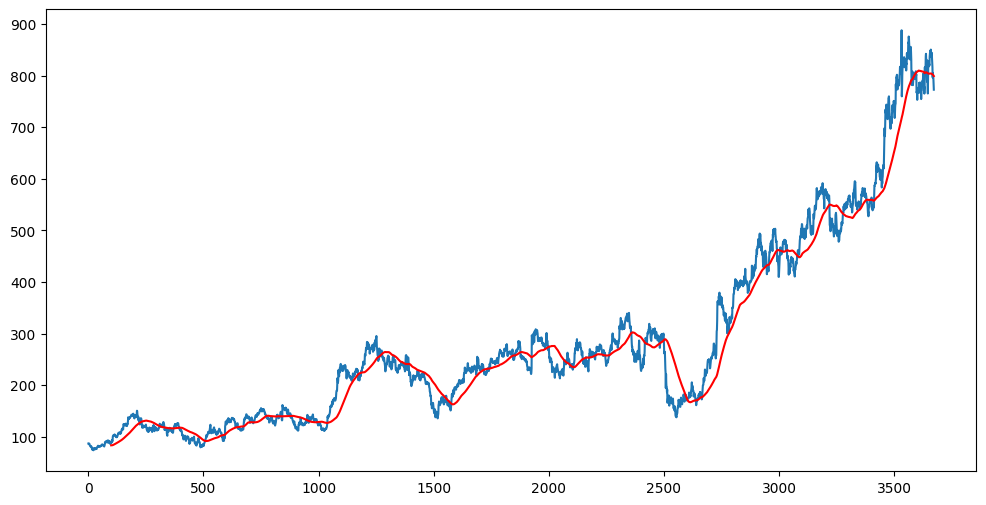

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,SBIN.BO
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3668,792.862620
3669,793.183034
3670,793.547301
3671,793.887692


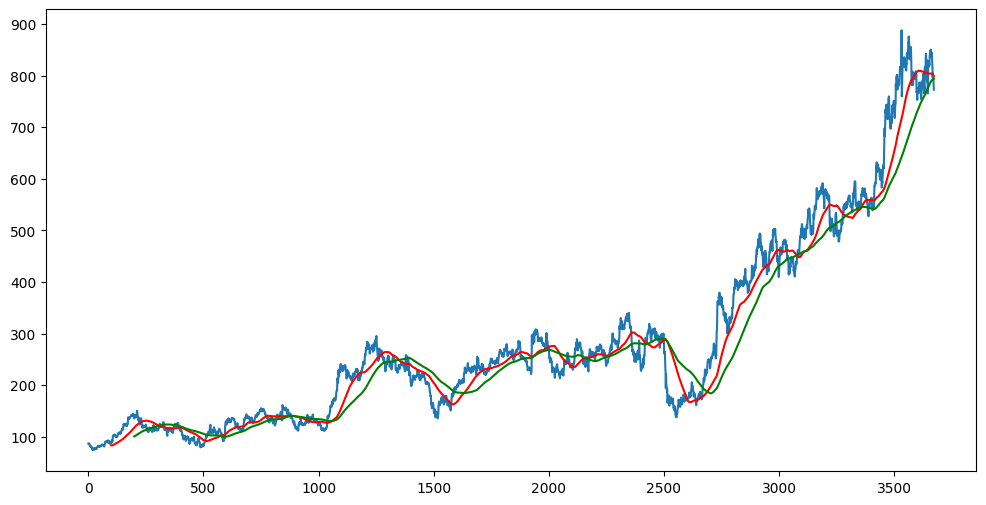

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [17]:
df.shape

(3673, 5)

In [18]:
# spliting data into training and testing


data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(2571, 1)
(1102, 1)


In [19]:
data_training.head()

Ticker,SBIN.BO
0,86.975395
1,86.986778
2,87.485878
3,87.013344
4,86.800812


In [20]:
data_testing.head()

Ticker,SBIN.BO
2571,158.178802
2572,164.304810
2573,171.665161
2574,175.962494
2575,168.785019


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04886336],
       [0.0489061 ],
       [0.05078027],
       ...,
       [0.33769815],
       [0.31984445],
       [0.31572442]])

In [23]:
data_training_array.shape

(2571, 1)

In [24]:
x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [25]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [31]:
x_train.shape

(2471, 100, 1)

In [26]:
# model

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 0.0963
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0114
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0099
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0101
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0078
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0079
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0072
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0066
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0060
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0058
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0056
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0052
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0056
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0047
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0046
Epo

In [35]:
model.save('keras_model.h5')

In [36]:
data_testing.head()

Ticker,SBIN.BO
2571,158.178802
2572,164.304810
2573,171.665161
2574,175.962494
2575,168.785019


In [37]:
data_training.tail(100)

Ticker,SBIN.BO
2471,290.756439
2472,287.053406
2473,286.779083
2474,289.019196
2475,295.556641
...,...
2566,171.710876
2567,162.018997
2568,163.893372
2569,159.138855


In [38]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df.head()

Ticker,SBIN.BO
0,290.756439
1,287.053406
2,286.779083
3,289.019196
4,295.556641


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20376179],
       [0.19882469],
       [0.19845895],
       ...,
       [0.87694487],
       [0.86112992],
       [0.84642609]])

In [43]:
input_data.shape

(1202, 1)

In [44]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])




In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1102, 100, 1)
(1102,)


In [46]:
# making predictions

In [47]:
y_predicted = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [48]:
y_predicted.shape

(1102, 1)

In [49]:
y_test

array([0.02700161, 0.03516915, 0.0449824 , ..., 0.87694487, 0.86112992,
       0.84642609])

In [50]:
y_predicted

array([[0.13798112],
       [0.13615541],
       [0.13515283],
       ...,
       [0.82977223],
       [0.8251345 ],
       [0.8212149 ]], dtype=float32)

In [51]:
scaler.scale_

array([0.00133326])

In [52]:
scale_factor = 1/0.00133326
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

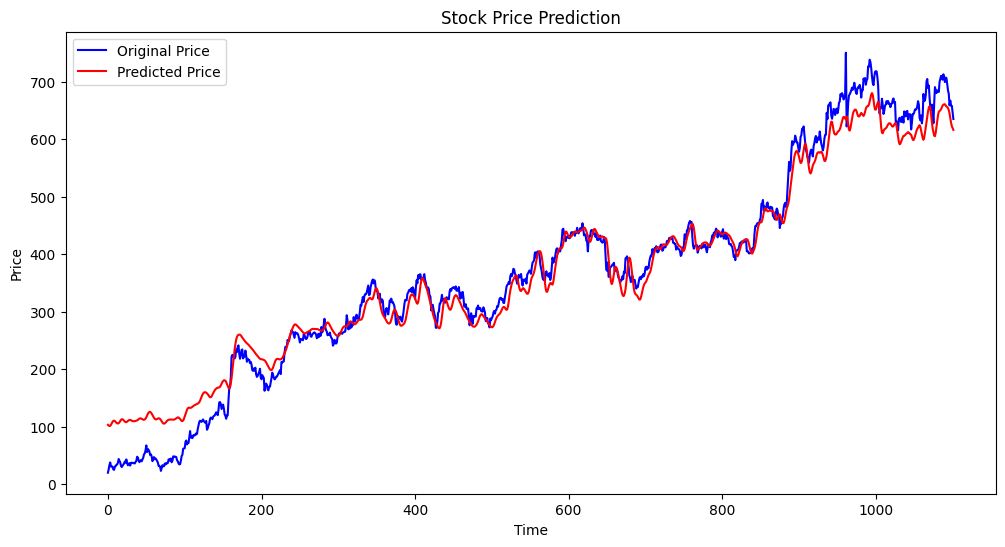

In [57]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()